In [1]:
# Домашнее задание №2: bonus по курсу "Машинное обучение"
# Выполнила Мирейко Наталья

import sys
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
min_x, max_x, min_y, max_y = -10, 1, -10, 1

def generate_training_set(k):
    N = P = k
    training_set = []
    
    # Чтобы алгоритм удовлетворял ограничению "вероятность того, что прямая с угловым наклоном k окажется разделяющей 
    # для полученной выборки должна не зависеть от k" сгенерируем разделяющую прямую при помощи случайного выбора 
    # двух точек в прямоугольнике. Потом относительно этой прямой раскидаем произвольно с одной стороны N точек, а с 
    # другой P (точки генерируем за  O(N+P))
    
    x_random1 = random.uniform(min_x, max_x)
    x_random2 = random.uniform(min_x, max_x)    
    
    # Будем использовать уравнение прямой (x - x_rand1)/(x_rand1-x_rand2) = (y - ymin)/(ymin - ymax)
    
    # Генерация положительного класса
    for x in range(0, P, 1):
        x_coord = random.uniform(min_x, max(x_random1, x_random2))       
        y_for_line = min_y + (min_y - max_y)*(x_coord - x_random1)/(x_random1 - x_random2)
        if x_coord < min(x_random1, x_random2):
            y_coord = random.uniform(min_y, max_y)
        elif x_random1 < x_random2:
            y_coord = random.uniform(y_for_line, max_y)
        else:
            y_coord = random.uniform(min_y, y_for_line)
        training_set.append((np.array([1, x_coord, y_coord]), 1))
        
    # Генерация отрицательного класса
    for x in range(0, N, 1):
        x_coord = random.uniform(min(x_random1, x_random2), max_x)
        y_for_line = min_y + (min_y - max_y)*(x_coord - x_random1)/(x_random1 - x_random2)
        if x_coord > max(x_random1, x_random2):
            y_coord = random.uniform(min_y, max_y)
        elif x_random1 < x_random2:
            y_coord = random.uniform(min_y, y_for_line)
        else:
            y_coord = random.uniform(y_for_line, max_y)
        training_set.append((np.array([1, x_coord, y_coord]), -1))
        
    return training_set

In [3]:
# Aлгоритм Batch perceptron для неоднородной модели
def batch_perceptron(training_set):
    w = np.array([0, 0, 0])
    iteration = 0
    while True:
        improvement_possible = False
        for index, training_element in enumerate(training_set):
            if (training_element[1] * sign(w.dot(training_element[0]))) <= 0:            
                w = w + training_element[1] * training_element[0]
                improvement_possible = True
                iteration += 1 
                break
        if not improvement_possible:
            min_indent = sys.maxint
            for index, training_element in enumerate(training_set):
                min_indent = min(w.dot(training_element[0])*training_element[1], min_indent)
            # Возвращаем параметры модели и минимальный отступ + номер итерации для построения графика
            return w, min_indent, iteration

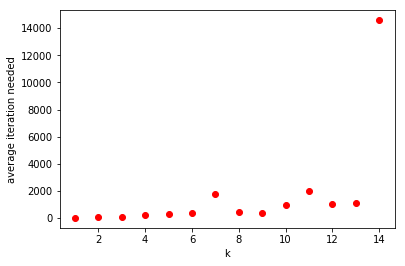

In [4]:
plt.xlabel('k')
plt.ylabel('average iteration needed')

for k in range(1, 15, 1):
    iterations_sum = 0
    attempts_count = 100
    for i in range(0, attempts_count, 1):
        iterations_sum += batch_perceptron(generate_training_set(k))[2]
    #Наносим точку на график
    plt.plot(k, iterations_sum / attempts_count, 'ro')
plt.show()